In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab
from scipy import stats

In [3]:
student= pd.read_csv('students.csv')

In order to showcase the pooled t-test we examine the mean annual salary (in Euro) of graduates. The first population consist of male students and the second population of female students. The question is, whether there is a difference in the mean annual salary of graduates related to gender?

In [4]:
male_salary= student[student.gender== 'Male'].salary.dropna()
female_salary= student[student.gender== 'Female'].salary.dropna()
print(f'No. of salarid male:{len(male_salary)}\nNo. of salaried female:{len(female_salary)}')

No. of salarid male:1079
No. of salaried female:674


In [5]:
male_sample= np.random.choice(male_salary, 50)
female_sample= np.random.choice(female_salary, 50)

Checking for normality

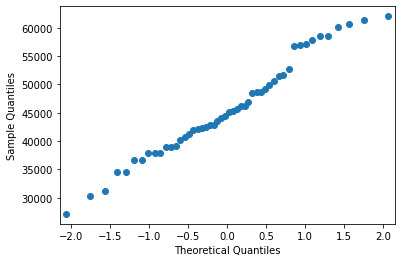

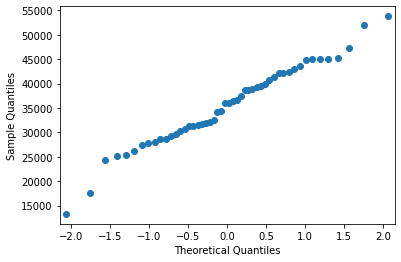

In [6]:
sm.qqplot(male_sample)
sm.qqplot(female_sample)
pylab.show()

In [7]:
# Equality of standard deviation
ratio= np.std(male_salary)/ np.std(female_salary)
ratio

1.2498480670663714

# Hypothesis testing for diference of mean (Independent sample)
1. $H_0:\mu_0=\mu_1$ and $H_a:\mu_0>\mu_1$
2. Significance level $\alpha= 0.01$
3. Calculate test statistic t as defined in notes

$\Large{For~equal~population variance}$

In [8]:
n= 50
s1= np.std(male_sample)
s2= np.std(female_sample)
x1_bar= np.mean(male_sample)
x2_bar= np.mean(female_sample)

In [9]:
sp= np.sqrt((49*s1**2+ 49*s2**2)/(98))
t= (x1_bar-x2_bar)/(sp*np.sqrt(2/n))

In [10]:
alpha=0.01

In [11]:
stats.ttest_ind(male_sample, female_sample)

Ttest_indResult(statistic=6.057729936887049, pvalue=2.5606266045768128e-08)

p= 3.2478301934579494e-05< 0.01. There fore we reject the null hypothesis.

$\Large{For~unequal~population~variance}$

In [12]:
stats.ttest_ind(male_sample, female_sample, equal_var= False)

Ttest_indResult(statistic=6.057729936887048, pvalue=2.573723759115537e-08)

Conclusion: As pvalue< 0.01, reject null hypothesis

# Hypothesis testing for difference of mean (Dependent sample)

In order to showcase the paired t-test for depended samples we are interested in the question if an online statistics learning tutorial helps students to improve their grades. There are three variables of interest in the students data set. The variable online.tutorial, is a binary variable, which is 1 if the student completed the online statistics learning tutorial or 0otherwise.
The variable score1 and score2 show the grades (0-100) for two exams on statistics. Note, that the first exam takes place before the students attended the online statistics learning tutorial. The participation in the online statistics learning tutorial is not mandatory, however the two exams are obligatory for all students.
Basically, there are two research questions of interest. First, we want to examine if the group of students which took the online statistics learning tutorial performs better on the second exam compared to the first exams. Second, we test how the group of students that did not join the online statistics learning tutorial performed on both test.

In [17]:
student.rename(columns={'online.tutorial':'online_tutorial'}, inplace= True)

In [35]:
# Considering all the students who took the online tutorial
n= 65
tutorial= student[student.online_tutorial== 1]
random_index= np.random.choice(np.arange(0, len(tutorial)), n)

In [36]:
score1_sample= tutorial.score1.iloc[random_index]
score2_sample= tutorial.score2.iloc[random_index]

<AxesSubplot:>

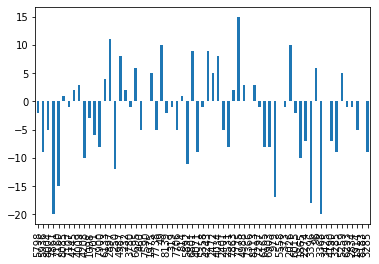

In [37]:
# Calculate thepairder difference d
d= score1_sample- score2_sample
d.plot.bar()

The plot shows that some students performed beter in the first exam compared to the second exam

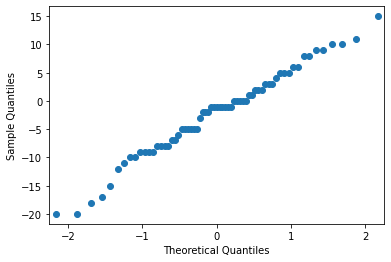

In [39]:
# Checking for normality of d
sm.qqplot(d);

Not exactly normal but can say look roughly normal

In [40]:
stats.ttest_rel(score1_sample, score2_sample)

Ttest_relResult(statistic=-2.2732507804866016, pvalue=0.026375869333036903)

From the t test we can reject the hypothesis. We can conclude that afer the tutorial test results have improved drastically.